<h1>The XOR Problem</h1>
<br>
<p>It is the problem of using a neural network to predict the outputs of XOR logic gates given two binary inputs. An XOR function should return a true value if the two inputs are not equal and a false value if they are equal.</p>
<img src="img/xor1.png">

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

arr_in = np.array([[0,0],[0,1],[1,0],[1,1]])
arr_out = np.array([[0],[1],[1],[0]])
lr = 0.1

# initialize the weights with random values
inp_layer, hidden_layer, out_layer = 2, 2, 1
hidden_weights = np.random.uniform(size=(inp_layer,hidden_layer))
hidden_bias = np.random.uniform(size=(1,hidden_layer))
out_weights = np.random.uniform(size=(hidden_layer, out_layer))
out_bias = np.random.uniform(size=(1,out_layer))

print(hidden_weights, hidden_bias, '\n\n', out_weights, out_bias)

[[0.38183687 0.43967174]
 [0.8430148  0.35339294]] [[0.20229276 0.02038771]] 

 [[0.2711091 ]
 [0.86929416]] [[0.84684709]]


In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

<IPython.core.display.Javascript object>


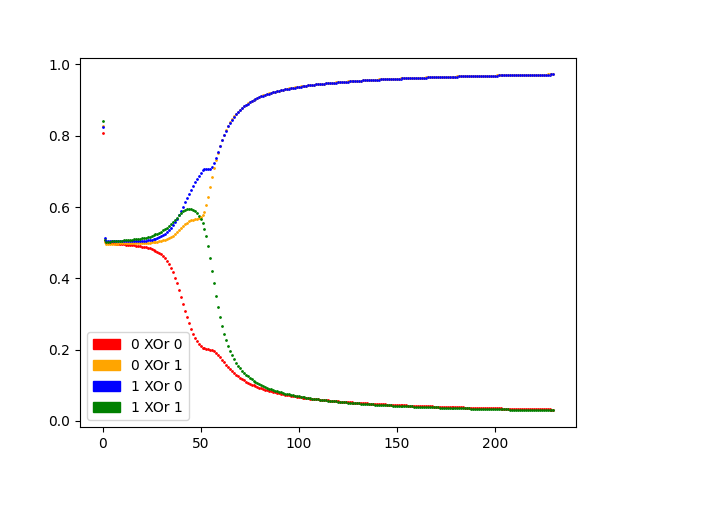

In [ ]:
#Initialize plot settings
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
red_patch = mpatches.Patch(color='red', label='0 XOr 0')
orange_patch = mpatches.Patch(color='orange', label='0 XOr 1')
blue_patch = mpatches.Patch(color='blue', label='1 XOr 0')
green_patch = mpatches.Patch(color='green', label='1 XOr 1')
plt.legend(handles=[red_patch, orange_patch, blue_patch, green_patch])
fig.show()
fig.canvas.draw()
a = 0

#Gradient descent
for i in range(50000):
    #Forward Propagation
    hidden_layer_activation = np.dot(arr_in, hidden_weights) + hidden_bias
    hidden_layer_out = sigmoid(hidden_layer_activation)
    out_layer_activation = np.dot(hidden_layer_out, out_weights) + out_bias
    predicted_out = sigmoid(out_layer_activation)
    
    #Plotting Results
    if i % 100 == 0:
        ax.plot(a,predicted_out[0][0],'ko',markersize=1, color='red', label='0 XOr 0')
        ax.plot(a,predicted_out[1][0],'ko',markersize=1, color='orange', label='0 XOr 1')
        ax.plot(a,predicted_out[2][0],'ko',markersize=1, color='blue', label='1 XOr 0')
        ax.plot(a,predicted_out[3][0],'ko',markersize=1, color='green', label='1 XOr 1')
        fig.canvas.draw()
        a+=1
    
    #Backpropagation
    error = arr_out - predicted_out
    d_predicted_out = error * sigmoid_derivative(predicted_out)  
    error_hidden_layer = d_predicted_out.dot(out_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_out)
    #Updating Weights and Biases
    
    out_weights += hidden_layer_out.T.dot(d_predicted_out) * lr
    out_bias += np.sum(d_predicted_out,axis=0,keepdims=True) * lr
    hidden_weights += arr_in.T.dot(d_hidden_layer) * lr
    hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr

print('Final Prediction:\n', predicted_out)